In [1]:
import numpy as np              
import matplotlib.pyplot as plt 
import pandas as pd             
import seaborn as sns           
import sklearn                 

In [23]:
file = 'hmeq.csv'
data_raw = pd.read_csv(file)
data_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


### 1) Кол-во данных > 1000

In [31]:
data_raw.shape

(5960, 13)

### 2) Несбалансированные классы - 80%/20%

In [32]:
data_raw['BAD'].value_counts(normalize=True)

0    0.800503
1    0.199497
Name: BAD, dtype: float64

### 3) Наличие пропущенных значений 

In [33]:
data_raw.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

### 4) Разнородные признаки

In [37]:
for i in data_raw.columns:
    print(i + '-----', data_raw[i].dtype)

BAD----- int64
LOAN----- int64
MORTDUE----- float64
VALUE----- float64
REASON----- object
JOB----- object
YOJ----- float64
DEROG----- float64
DELINQ----- float64
CLAGE----- float64
NINQ----- float64
CLNO----- float64
DEBTINC----- float64


### 5) Наличие выбросов
Пользуясь аналитичекими и графическими инструментами, можно заметить небольшое количество выбросов

In [46]:
for i in data_raw.columns:
    if data_raw[i].dtype == 'float64':
        display(i, data_raw[i].quantile([.01,.05,.1,.5,.95,.99]), 'Mean = ' + str(data_raw[i].mean()))

'MORTDUE'

0.01      7855.40
0.05     18232.40
0.10     26976.60
0.50     65019.00
0.95    151999.55
0.99    232230.41
Name: MORTDUE, dtype: float64

'Mean = 73760.81719955898'

'VALUE'

0.01     26262.2
0.05     39050.7
0.10     48800.0
0.50     89235.5
0.95    203717.2
0.99    289962.8
Name: VALUE, dtype: float64

'Mean = 101776.04874145007'

'YOJ'

0.01     0.0
0.05     0.0
0.10     1.0
0.50     7.0
0.95    24.0
0.99    30.0
Name: YOJ, dtype: float64

'Mean = 8.922268135904508'

'DEROG'

0.01    0.0
0.05    0.0
0.10    0.0
0.50    0.0
0.95    2.0
0.99    4.0
Name: DEROG, dtype: float64

'Mean = 0.2545696877380046'

'DELINQ'

0.01    0.0
0.05    0.0
0.10    0.0
0.50    0.0
0.95    3.0
0.99    5.0
Name: DELINQ, dtype: float64

'Mean = 0.4494423791821561'

'CLAGE'

0.01     30.242642
0.05     68.912654
0.10     84.554295
0.50    173.466667
0.95    321.633333
0.99    399.544930
Name: CLAGE, dtype: float64

'Mean = 179.76627518656667'

'NINQ'

0.01    0.00
0.05    0.00
0.10    0.00
0.50    1.00
0.95    4.00
0.99    8.51
Name: NINQ, dtype: float64

'Mean = 1.1860550458715597'

'CLNO'

0.01     0.0
0.05     7.0
0.10    10.0
0.50    20.0
0.95    40.0
0.99    50.0
Name: CLNO, dtype: float64

'Mean = 21.29609620076682'

'DEBTINC'

0.01    13.276387
0.05    20.511886
0.10    23.778369
0.50    34.818262
0.95    42.767852
0.99    49.220262
Name: DEBTINC, dtype: float64

'Mean = 33.779915348721225'

No handles with labels found to put in legend.


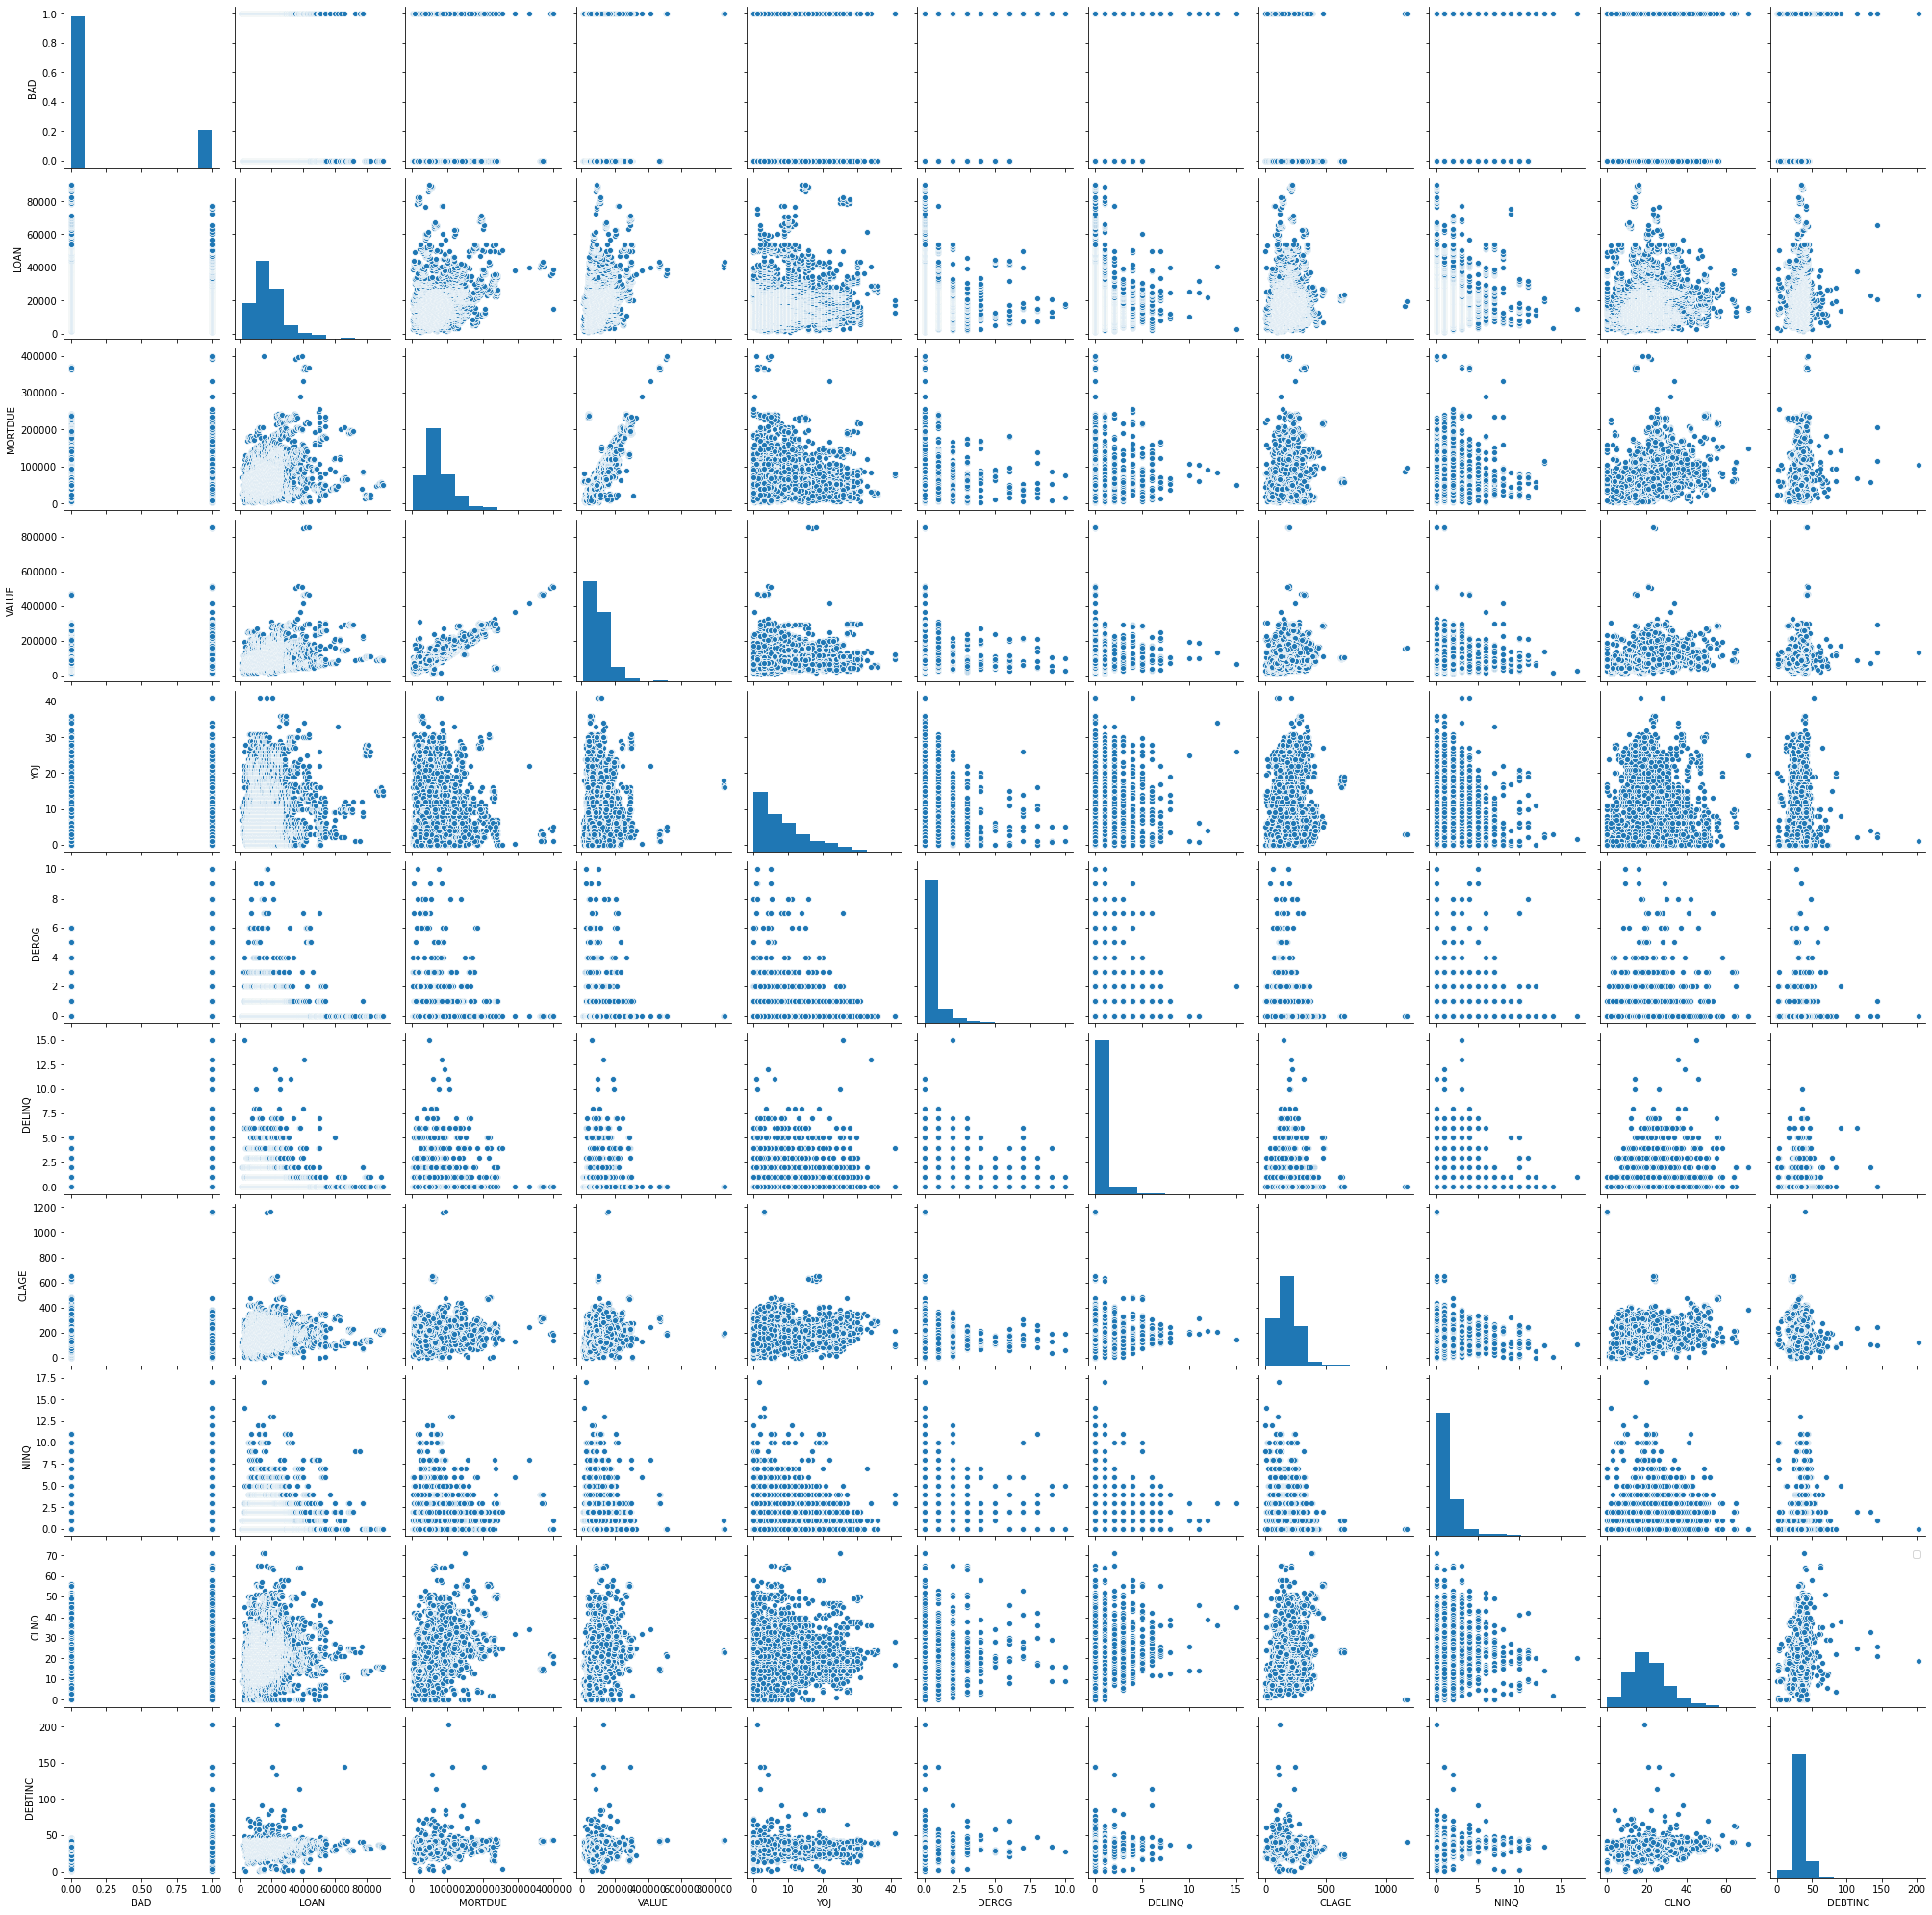

In [39]:
sns.pairplot(data_raw, diag_kind='hist')
plt.legend()
pass